In [2]:
import json

In [3]:
ml_results = json.loads(open('GRPO/recaller_metrics_data/ml-1m_user_position_metrics_bpr_gru4rec_itemknn_lightgcn_pop_sasrec_simplex.json').read())

In [4]:
ml_results['1']['position_metrics'].keys()

dict_keys(['5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52'])

In [5]:
import pandas as pd
from collections import defaultdict

# 初始化存储结构
# position -> { 'count': 0, 'best_counts': {recaller: count}, 'ndcg_sums': {recaller: sum} }
pos_stats = defaultdict(lambda: {
    'user_count': 0,
    'best_counts': defaultdict(int),
    'ndcg_sums': defaultdict(float)
})

# 遍历所有用户数据
for uid, user_data in ml_results.items():
    if 'position_metrics' not in user_data:
        continue
        
    for pos_str, metrics in user_data['position_metrics'].items():
        pos = int(pos_str)
        stats = pos_stats[pos]
        stats['user_count'] += 1
        
        # 统计 Best Recaller
        if 'best_recaller' in metrics:
            stats['best_counts'][metrics['best_recaller']] += 1
            
        # 累加每个 Recaller 的 NDCG@10
        for key, val in metrics.items():
            # 排除非 Recaller 的键 (best_recaller, ground_truth)
            if key not in ['best_recaller', 'ground_truth'] and isinstance(val, dict):
                # 这里使用 ndcg@10，因为生成脚本中是用它来判定 best 的
                ndcg = val.get('ndcg@10', 0.0)
                stats['ndcg_sums'][key] += ndcg

# 转换为 DataFrame
rows = []
for pos in sorted(pos_stats.keys()):
    stats = pos_stats[pos]
    n = stats['user_count']
    if n == 0: continue
    
    row = {
        'position': pos,
        'user_count': n
    }
    
    # 计算 Best Recaller 占比
    for rec, count in stats['best_counts'].items():
        row[f'best_{rec}_prop'] = count / n
        
    # 计算平均 NDCG
    for rec, total in stats['ndcg_sums'].items():
        row[f'avg_ndcg_{rec}'] = total / n
        
    rows.append(row)

df_pos = pd.DataFrame(rows).set_index('position')

# 显示前几行
print(f"Total positions analyzed: {len(df_pos)}")
df_pos.head(10)
import pandas as pd
from collections import defaultdict

# 初始化存储结构
# position -> { 'count': 0, 'best_counts': {recaller: count}, 'ndcg_sums': {recaller: sum} }
pos_stats = defaultdict(lambda: {
    'user_count': 0,
    'best_counts': defaultdict(int),
    'ndcg_sums': defaultdict(float)
})

# 遍历所有用户数据
for uid, user_data in ml_results.items():
    if 'position_metrics' not in user_data:
        continue
        
    for pos_str, metrics in user_data['position_metrics'].items():
        pos = int(pos_str)
        stats = pos_stats[pos]
        stats['user_count'] += 1
        
        # 统计 Best Recaller
        if 'best_recaller' in metrics:
            stats['best_counts'][metrics['best_recaller']] += 1
            
        # 累加每个 Recaller 的 NDCG@10
        for key, val in metrics.items():
            # 排除非 Recaller 的键 (best_recaller, ground_truth)
            if key not in ['best_recaller', 'ground_truth'] and isinstance(val, dict):
                # 这里使用 ndcg@10，因为生成脚本中是用它来判定 best 的
                ndcg = val.get('ndcg@10', 0.0)
                stats['ndcg_sums'][key] += ndcg

# 转换为 DataFrame
rows = []
for pos in sorted(pos_stats.keys()):
    stats = pos_stats[pos]
    n = stats['user_count']
    if n == 0: continue
    
    row = {
        'position': pos,
        'user_count': n
    }
    
    # 计算 Best Recaller 占比
    for rec, count in stats['best_counts'].items():
        row[f'best_{rec}_prop'] = count / n
        
    # 计算平均 NDCG
    for rec, total in stats['ndcg_sums'].items():
        row[f'avg_ndcg_{rec}'] = total / n
        
    rows.append(row)

df_pos = pd.DataFrame(rows).set_index('position')

# 显示前几行
print(f"Total positions analyzed: {len(df_pos)}")
df_pos.head(10)

Total positions analyzed: 1919
Total positions analyzed: 1919


,user_count,best_bpr_prop,best_itemknn_prop,best_pop_prop,best_gru4rec_prop,best_sasrec_prop,best_lightgcn_prop,best_simplex_prop,avg_ndcg_bpr,avg_ndcg_gru4rec,avg_ndcg_itemknn,avg_ndcg_lightgcn,avg_ndcg_pop,avg_ndcg_sasrec,avg_ndcg_simplex
position,,,,,,,,,,,,,,,
5,6038,0.639285,0.048360,0.028486,0.145412,0.081981,0.039748,0.016727,0.164592,0.195591,0.104592,0.166396,0.090030,0.191728,0.077039
6,6038,0.559622,0.044386,0.021365,0.203544,0.111130,0.044386,0.015568,0.178215,0.264939,0.114717,0.186670,0.084449,0.251334,0.075001
7,6037,0.511512,0.045718,0.018884,0.244658,0.125228,0.036276,0.017724,0.178976,0.300721,0.122252,0.188726,0.077826,0.278402,0.071363
8,6037,0.480702,0.042405,0.019546,0.275468,0.124731,0.042736,0.014411,0.181738,0.321963,0.124044,0.191841,0.074158,0.286613,0.067927
9,6033,0.455329,0.043096,0.019228,0.292723,0.134096,0.039118,0.016410,0.168268,0.324023,0.120734,0.180040,0.066165,0.291462,0.059164
10,6032,0.461373,0.044430,0.020060,0.284814,0.137102,0.036804,0.015418,0.179006,0.326692,0.132295,0.185230,0.068057,0.290770,0.061183
11,6027,0.443172,0.046458,0.018583,0.305127,0.131906,0.038991,0.015762,0.173291,0.335486,0.133418,0.179114,0.066197,0.302525,0.056679
12,6023,0.441142,0.047983,0.019758,0.298522,0.135647,0.043998,0.012950,0.177055,0.334020,0.133784,0.186269,0.067638,0.301932,0.059272
13,6010,0.438436,0.047587,0.017304,0.302163,0.136273,0.041098,0.017138,0.157770,0.326476,0.124521,0.167941,0.060529,0.292540,0.055237


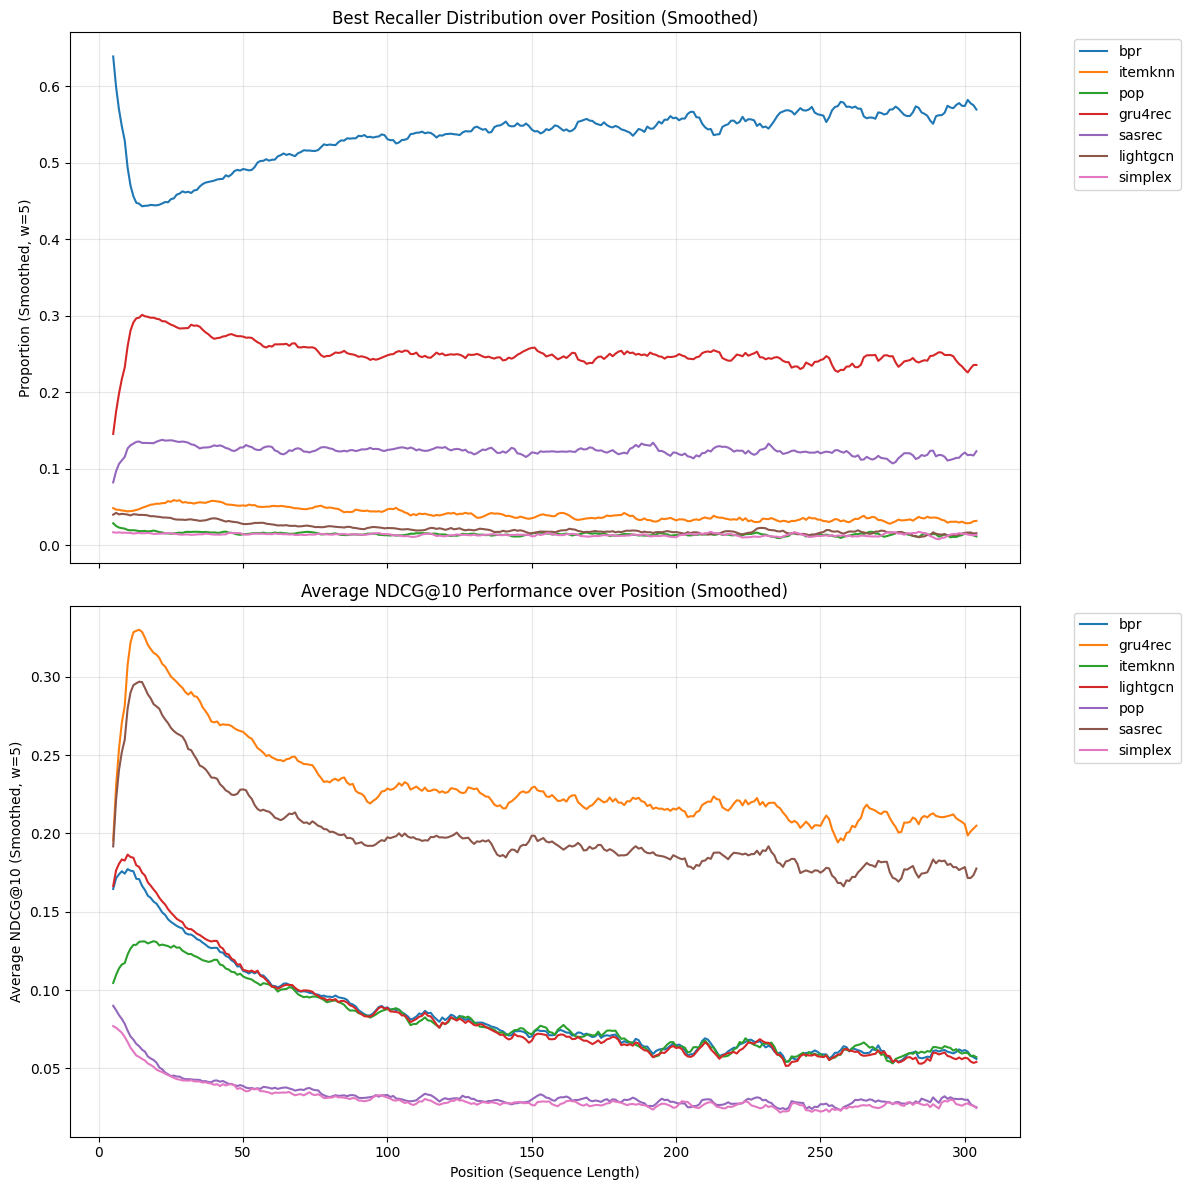

In [6]:
import matplotlib.pyplot as plt

# 筛选列
best_prop_cols = [c for c in df_pos.columns if c.startswith('best_') and c.endswith('_prop')]
avg_ndcg_cols = [c for c in df_pos.columns if c.startswith('avg_ndcg_')]

# 平滑参数 (滑动窗口大小)
window_size = 5 
cut_off = 300
# 创建画布
fig, axes = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# 图1: Best Recaller 比例 (平滑后)
for col in best_prop_cols:
    rec_name = col.replace('best_', '').replace('_prop', '')
    # 使用 rolling mean 进行平滑
    smoothed_data = df_pos[col].rolling(window=window_size, min_periods=1).mean()
    axes[0].plot(df_pos.index[:cut_off], smoothed_data[:cut_off], label=rec_name)

axes[0].set_ylabel(f'Proportion (Smoothed, w={window_size})')
axes[0].set_title(f'Best Recaller Distribution over Position (Smoothed)')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].grid(True, alpha=0.3)

# 图2: 平均 NDCG 趋势 (平滑后)
for col in avg_ndcg_cols:
    rec_name = col.replace('avg_ndcg_', '')
    # 使用 rolling mean 进行平滑
    smoothed_data = df_pos[col].rolling(window=window_size, min_periods=1).mean()
    axes[1].plot(df_pos.index[:cut_off], smoothed_data[:cut_off], label=rec_name)

axes[1].set_ylabel(f'Average NDCG@10 (Smoothed, w={window_size})')
axes[1].set_xlabel('Position (Sequence Length)')
axes[1].set_title(f'Average NDCG@10 Performance over Position (Smoothed)')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()